In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.14.0'

## Prep Simple Data
Here, the dependent variable will JUST BE +10 of the independent variable:

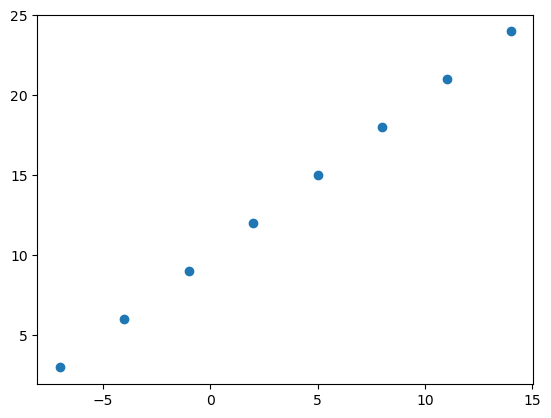

In [43]:
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

# Create features
indVar = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
depVar = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(indVar, depVar);

## Train A Model

In [44]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
layer1 = tf.keras.layers.Dense(1)
model = tf.keras.Sequential()
model.add(layer1)

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(indVar, axis=-1), depVar, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 16.8788 - mae: 16.8788
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 16.5976 - mae: 16.5976
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 16.3163 - mae: 16.3163
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 16.0351 - mae: 16.0351
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 15.7538 - mae: 15.7538


## Predict With The Model

In [45]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 178ms/step


array([[-8.86956]], dtype=float32)

hmmm....
the model guess was 12, but we know the answer should be 27....it's a little off.

## Improve the Model: More Epochs
Many ways can be used to improve the performance of a model:
- **During creation**:
  - use a different number of layers
  - use different types of layers
  - change the activation function of each layer
- **During model compilation**:
  - change the optimizer function (i.e adam)
  - change the learning rate of the optimizer function (higher leads to bigger "Steps", lower leads to smaller "steps")
- **During model fitting**:
  - add more epochs
  - add more data

### Increase the training epoch count

In [46]:
# Create & compile a model (same as above)
modelTwo = tf.keras.Sequential()
modelTwo.add(layer1)
modelTwo.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
modelTwo.fit(tf.expand_dims(indVar, axis=-1), depVar, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 1s 952ms/step - loss: 15.4726 - mae: 15.4726
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 15.1913 - mae: 15.1913
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 14.9138 - mae: 14.9138
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 14.7813 - mae: 14.7813
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 14.6488 - mae: 14.6488
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 14.5163 - mae: 14.5163
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 14.3838 - mae: 14.3838
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 14.2513 - mae: 14.2513
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 14.1188 - mae: 14.1188
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 13.9863 - mae: 13.9863
Epoch 11/100
1/1 [==============================

### Predict Again

In [47]:
# Try and predict what y would be if X was 17.0
modelTwo.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 168ms/step


array([[29.515434]], dtype=float32)

the model guessed `29`, and the expected response is `27`: **CLOSER!!**  

## Improve the model: adding a layer

In [48]:
# CREATE & COMPILE & FITthe model
modelThree = tf.keras.Sequential()
m3L1 = tf.keras.layers.Dense(100, activation="relu")
m3L2 = tf.keras.layers.Dense(1)
modelThree.add(m3L1)
modelThree.add(m3L2)
modelThree.compile(loss=tf.keras.losses.mae, 
                   optimizer=tf.keras.optimizers.SGD(),
                  metrics=["mae"])
modelThree.fit(tf.expand_dims(indVar, axis=-1), depVar, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.8534 - mae: 12.8534
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 12.2273 - mae: 12.2273
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 11.6047 - mae: 11.6047
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 10.9744 - mae: 10.9744
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.3196 - mae: 10.3196
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 9.6382 - mae: 9.6382
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 8.9336 - mae: 8.9336
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 8.1899 - mae: 8.1899
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 7.4065 - mae: 7.4065
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 6.5808 - mae: 6.5808
Epoch 11/100
1/1 [==============================] - 0s 15ms/s

In [49]:
# Try and predict what y would be if X was 17.0
modelThree.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 223ms/step


array([[32.356853]], dtype=float32)

hmm... the output is `32`. The goal is `27`. This is WORSE than the previous model with less layers.  
This seems to be a crux of machine-learning: experimentation.  
Not sure how much it relates to this "learn-by-building" approach or not.  

## Improve the model: activation, optimization, and learning-rate

In [50]:
# activation=None
# optimizers.Adam()

# CREATE & COMPILE & FITthe model
mFour = tf.keras.Sequential()
m4L1 = tf.keras.layers.Dense(50, activation=None)
m4L2 = tf.keras.layers.Dense(1)
mFour.add(m4L1)
mFour.add(m4L2)
mFour.compile(loss=tf.keras.losses.mae, 
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=["mae"])
mFour.fit(tf.expand_dims(indVar, axis=-1), depVar, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.9719 - mae: 13.9719
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 13.3078 - mae: 13.3078
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 12.6463 - mae: 12.6463
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 11.9838 - mae: 11.9838
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 11.3169 - mae: 11.3169
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 10.6430 - mae: 10.6430
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 9.9593 - mae: 9.9593
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 9.2629 - mae: 9.2629
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 8.5505 - mae: 8.5505
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 7.8185 - mae: 7.8185
Epoch 11/100
1/1 [==============================] - 0s 15ms

In [51]:
# Try and predict what y would be if X was 17.0
mFour.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 188ms/step


array([[27.622854]], dtype=float32)

It guessed `27.62`, VERY CLOSE to the goal of `27`!